<a href="https://colab.research.google.com/github/kalz2q/mycolabnotebooks/blob/master/math_sympy_short.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# メモ

数学を学ぶためになんらかの数式処理システムは必須だろう。

この colab のノートブックは sympy という数式処理システムについての学習資料である。

colab で開き、メニューの「ドライブにコピー」で自分の環境にコピーして、セルを編集・実行しながら読むことを想定している。 自由に壊しながら学んで欲しい。

# sympy による数式処理 


sympy による数式処理でできること

* 数式を扱う
* 数式を解く
* 数式を微積分する
* 数式をグラフにする

ほかにもいろいろできることがある。 sympy のホームページ (sympy.org) には tutorial もある。

&nbsp;



# sympy を使うための準備

sympy は import が必要。

変数も宣言が必要。 from sympy.abc import * という手もある。

print の代わりに display を使うと latex で表示してくれる。 数学においてシンボルは大切。

x に値を入れなくても x - x == 0 を評価して真を返すという演算ができる。

次のコードセルを実行する。

&nbsp;


In [ ]:
# sympy を使うための準備
from sympy import *
x = symbols ('x')
display(x)
display(x - x == 0)
display(x - x)

x

True

0

次の式を確かめてみよう。

$$(a + b) ^ 2 = a ^ 2 + 2ab + b ^2$$


&nbsp;


In [ ]:
from sympy.abc import *
from sympy import *
expr = (a + b) ** 2 
display(expr)

(a + b)**2

右辺のような入れ方をするとどうなるか。

In [ ]:
expr2 = a**2+2*a*b+b**2
display(expr2)

a**2 + 2*a*b + b**2

展開 expand したり、因数分解 factor したりできる。

In [ ]:
display(expand(expr))

a**2 + 2*a*b + b**2

In [ ]:
display(factor(expr2))

(a + b)**2

同等性を確かめる。

In [ ]:
# 実験
from sympy.abc import *
from sympy import *
expr = (a + b) ** 2 
expr2 = a**2+2*a*b+b**2
display(expr)
display(expr2)
display(expr == expr) # 自分自身とは同等
display(expr == expr2) # 式の形が違えば同等ではない False
display(expr == expand(expr))
a=2;b=3 # 変数に値をだいにゅうしてから式を定義してみる
expr = (a + b) ** 2 
expr2 = a**2+2*a*b+b**2
display(expr == expr2) # 今度は同等になった
display(expr == expand(expr))

(a + b)**2

a**2 + 2*a*b + b**2

True

False

False

True

True

上の実験からわかることは数式の形が違うと `==` は真にはならない。

値が入れば、当然 `==` が真になる。

latex という関数で latex 表現を得ることができる。

In [ ]:
from sympy.abc import *
from sympy import *
expr = (a + b) ** 2 
latex(expand(expr))

latex はテキストセルで表示できる。

`a^{2} + 2 a b + b^{2}`
$$a^{2} + 2 a b + b^{2}$$

&nbsp;




**練習問題** $\quad$ sympy を使って下記の等式を確認する。

* $(a - b) ^ 2 = a ^ 2 - 2 a b + b^2$
* $a ^ 2 - b ^ 2 = (a - b) (a + b)\quad$ (`expand` ではなく `factor` を使ってみる)

In [ ]:
from sympy.abc import *
from sympy import *
expr = (a-b)**2
display(expr)
display(expand(expr))

(a - b)**2

a**2 - 2*a*b + b**2

In [ ]:
from sympy.abc import *
from sympy import *
expr = a**2-b**2
display(expr)
display(factor(expr))

a**2 - b**2

(a - b)*(a + b)

# 数式を解く

sympy を使って $x$ について、次の 2次方程式 (quadratic equasion) を解く。

$$a x ^ 2 + b x + c = 0$$

&nbsp;

In [ ]:
from sympy.abc import *
from sympy import *
expr = a * x ** 2 + b * x + c
display(solveset(expr,x))

FiniteSet(-b/(2*a) - sqrt(-4*a*c + b**2)/(2*a), -b/(2*a) + sqrt(-4*a*c + b**2)/(2*a))

sympy の `solveset` は引数を 2 つ取り、第 1 引数は数式で、第 2 引数は解く対象となる変数を指定する。

返り値は解の集合 set であり、解がない場合は空集合が返される。

&nbsp;



**練習問題** $\quad$ sympy を使って 3 次方程式の一般解を求める。

$$a x ^ 3 + b x ^ 2 + c  x + d = 0$$

&nbsp;


In [ ]:
from sympy.abc import *
from sympy import *
expr = a * x ** 3 + b * x**2 + c*x + d
display (expr)
display(solveset(expr,x))

 `solveset` に引数を足して、解の範囲 domain を指定することが可能である。

 次の式の domain を $\mathbb{R}$ として解いてみる。

$$x^2=-1$$

メモ $\quad$ domain は S.Reals とかで指定する。 S の書式は dir(S) で調べられる。黒板ボールドは `\mathbb` で表記できる。

In [ ]:
solveset(x ** 2 + 1, x, domain=S.Reals)

EmptySet

$\emptyset$ は空集合の意味である。

空集合は `\emptyset` `\varnothing` `\phi` で表される。$\emptyset, \varnothing, \phi$

&nbsp;



**練習問題** $\quad$ sympy を使って次の方程式を解く

* $x ^ 2 = 2$ $\quad (x \in \mathbb{N})$
* $x ^ 3 + 2 x = 0$ $\quad (x \in \mathbb{R})$

&nbsp;


In [ ]:
from sympy.abc import *
from sympy import *
expr = x**2 - 2
display (expr)
display(solveset(expr,x,domain=S.Naturals)) # 自然数の範囲で解はないので空集合になる

In [ ]:
from sympy.abc import *
from sympy import *
expr = x**3 + 2*x
display (expr)
display(solveset(expr,x,domain=S.Reals)) # 実数の範囲の解は 0 のみ

# 微分積分方程式 

sympy で極限 limit を扱うことができる。

次の式を考えよう。

$$\lim_{x\to 0^+}\frac{1}{x}$$

&nbsp;


In [ ]:
from sympy.abc import *
from sympy import *
display(limit(1/x, x, 0, dir="+"))


**練習問題** $\quad$ 次の極限を計算する。

1. $\displaystyle \lim_{x\to 0^-}\frac{1}{x}$
2. $\displaystyle \lim_{x\to 0}\frac{1}{x^2}$

&nbsp;


In [ ]:
from sympy.abc import *
from sympy import *
display(limit(1/x, x, 0, dir="-"))
display(limit(1/x**2, x, 0))


sympy を使って微分 differentiate/Derivative や積分 integrate/Integral ができる。

次の式を微分する。

$$x ^ 2 - \cos(x)$$

&nbsp;


微分方程式は `Derivative` 、微分計算は `diff`

sympy で大文字で始まる関数は数式表示のためのもので、小文字で始まる関数が数式を計算するもの。

In [ ]:
from sympy.abc import *
from sympy import *
expr = x**2 - cos(x)
display(Derivative(x ** 2 - cos(x), x))
display(Derivative(expr, x))
display(diff(x ** 2 - cos(x), x))
display(diff(expr, x))

Derivative(x**2 - cos(x), x)

Derivative(x**2 - cos(x), x)

2*x + sin(x)

2*x + sin(x)

積分は Integral と integrate

In [ ]:
from sympy.abc import *
from sympy import *
expr = x**2 - cos(x)
display(expr)
display(Integral(expr, x))
display(integrate(expr, x))
integrate(x ** 2 - cos(x), x)

定積分は次のように行う。

In [ ]:
from sympy.abc import *
from sympy import *
expr = x**2 - cos(x)
display(Integral(expr, (x, 0, 5)))
display(integrate(expr,  (x, 0, 5)))
integrate(x ** 2 - cos(x), (x, 0, 5))



**練習問題** $\quad$ sympy を使って下記の式を計算する。

1. $\displaystyle \frac{d\sin(x ^2)}{dx}$
2. $\displaystyle \frac{d(x ^2 + xy - \ln(y))}{dy}$
3. $\displaystyle \int e^x \cos(x)\;dx$
4. $\displaystyle \int_0^5 e^{2x}\;dx$

In [ ]:
from sympy.abc import *
from sympy import *
expr = sin (x**2)
display(Derivative(expr, x))
display(diff(expr,  x))


In [ ]:
from sympy.abc import *
from sympy import *
expr = x**2+x*y-log(y)
display(Derivative(expr, y))
display(diff(expr,  y))

In [ ]:
from sympy.abc import *
from sympy import *
expr = exp(x)*cos(x)
display(expr)
display(Integral(expr, x))
display(integrate(expr,  x))

In [ ]:
from sympy.abc import *
from sympy import *
expr = exp(2*x)
display(expr)
display(Integral(expr, (x,0,5)))
display(integrate(expr, (x,0,5)))

# グラフ描画 

plotting

メモ $\quad$ ここで注意。 sympy で簡易に例えば $y=x^2$ のグラフが描けるが、グラフは本来座標の範囲を決めたり、ゼロをどこに置くか、目盛りをどうするかなど面倒な設定が必要なところを裏で処理している。 

裏で動いているのが matplotlib (http://matplotlib.org/) という python のライブラリーだが、これも簡易な使い方と細かく設定して使う方法がある。

sympy でグラフ描画する際には matplotlib のどの機能を使っているとか、意識しながら使うのがよいと思う。

sympy による描画と、numpy と matplotlib を明示的に使うことによる描画を両方学ぶ。

&nbsp;


sympy で $x^2$ のグラフを描く

In [ ]:
from sympy.abc import *
from sympy import *
expr = x ** 2
p = plot(expr);

matplotlib と numpy では次のように描く。

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-10, 10, 100) # 100に刻む
fig, ax = plt.subplots()  # figure と ax を作る
ax.spines['left'].set_position(('data', 0)) # 座標の位置を変える
ax.spines['right'].set_visible(False) # 座標を見えなくする
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position(('data', 0))
ax.set_xlabel('x')  # x軸のラベル
ax.set_ylabel('f(x)')  # y軸のラベル
ax.plot(x, x**2)  # プロットする
plt.show()


**練習問題** $\quad$ 次の関数をグラフ描画する。

* $y=x + cos(x)$
* $y=x ^ 2 - e^x$ (you might find `ylim` helpful as an argument)




In [ ]:
from sympy.abc import *
from sympy import *
expr = x + cos(x)
p = plot(expr)

同じグラフを numpy+matplotlib で描く。

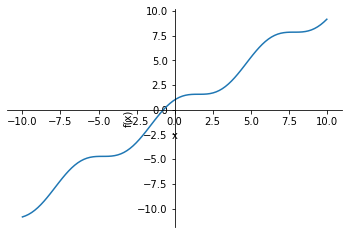

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-10, 10, 100) # 100に刻む
fig, ax = plt.subplots()  # figure と ax を作る
ax.spines['left'].set_position(('data', 0))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position(('data', 0))
ax.set_xlabel('x')  # x軸のラベル
ax.set_ylabel('f(x)')  # y軸のラベル
ax.plot(x, x + np.cos(x))  # cos は numpy の cos を使うので注意
plt.show()

In [ ]:
from sympy.abc import *
from sympy import *
expr = x**2 - exp(x)
p = plot(expr, xlim=(-1,10))

同じグラフを numpy+matplotlib で描く。

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-1, 10, 100) # 100に刻む
fig, ax = plt.subplots()  # figure と ax を作る
ax.spines['left'].set_position(('data', 0))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position(('data', 0))
ax.set_xlabel('x')  # x軸のラベル
ax.set_ylabel('f(x)')  # y軸のラベル
ax.plot(x, x**2 - np.exp(x))  # exp は numpy の exp を使うので注意
plt.show()